In [4]:
import numpy as np
import sympy as sp
from numba import njit,jit,prange
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
@njit
def difference_iteration(u,alpha,psi,tau,dx):
    tn = u.shape[1]
    N = u.shape[0]

    phi = u[:,0]
    
    for i in range(1,NS):
        u[i,1] = (1-alpha**2)*phi[i] + alpha**2/2*(phi[i+1] + phi[i-1]) + tau*psi[i]
    
    for k in range(1,tn-1):
        for i in range(1,N-1):
            u[i,k+1] = 2*(1-alpha**2)*u[i,k] + alpha**2*(u[i+1,k] + u[i-1,k]) - u[i,k-1]
    
    return u

In [5]:
# 网格
h = 0.1
T = 0.5
l = 1.

alpha = 0.5
tau = alpha*h

N = int(l/h)
M = int(T/tau)

u = np.zeros([N,M])
psi = np.zeros(N)

# 边界条件

u[:,0] = np.sin(np.pi*np.linspace(0,1,N))
psi[:] = np.linspace(0,1,N)*(1-np.linspace(0,1,N))

u[0,:] = 0
u[-1,:] = 0


In [110]:
u = difference_iteration(u,alpha,psi,tau,h)

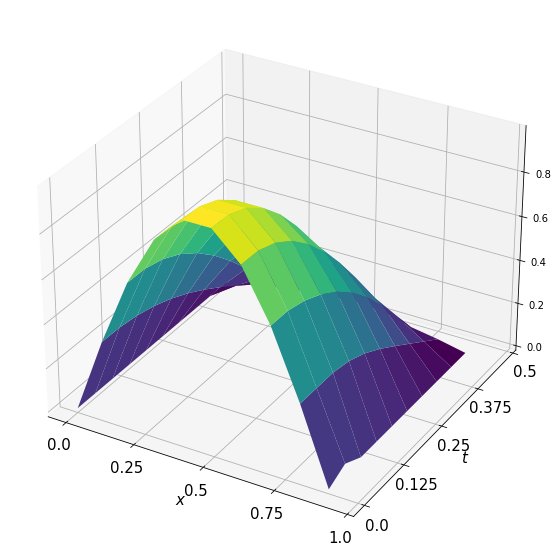

In [115]:
%matplotlib inline
def f(x, y):
    return u[x,y]

x = np.arange(0, M, 1)
y = np.arange(0, N, 1)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
plt.xticks(np.linspace(0,M,5,endpoint=True), np.linspace(0,1,5,endpoint=True), rotation=0, fontsize=15)
plt.yticks(np.linspace(0,N,5,endpoint=True), np.linspace(0,0.5,5,endpoint=True), rotation=0, fontsize=15)
plt.ylabel(r'$t$',fontsize=15)
plt.xlabel(r'$x$',fontsize=15)
plt.show()